In [97]:
import pandas as pd
import numpy as np

In [98]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [99]:
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [1]:
!pip install tensorflow

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.8/390.3 MB 58.6 MB/s eta 0:00:07
   ---------------------------------------- 4.5/390.3 MB 57.4 MB/s eta 0:00:07
    --------------------------------------- 5.5/390.3 MB 50.2 MB/s eta 0:00:08
    --------------------------------------- 6.4/390.3 MB 40.8 MB/s eta 0:00:10
    --------------------------------------- 7.9/390.3 MB 36.1 MB/s eta 0:00:11
    --------------------------------------- 9.4/390.3 MB 37.5 MB/s eta 0:00:11
   - -------------------------------------- 11.2/390.3 MB 36.4 MB/s eta 0:00:11
   - -------------------------------------- 12.3/390.3 MB 34.4 MB/s eta 0:00:1

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Visualizing the Image Data

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
x_train.shape

(60000, 28, 28)

In [102]:
len(x_train)

60000

In [103]:
type(x_train[0])

numpy.ndarray

In [104]:
x_train[0].shape

(28, 28)

In [105]:
single_image = x_train[0]

In [106]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [107]:
single_image.shape

(28, 28)

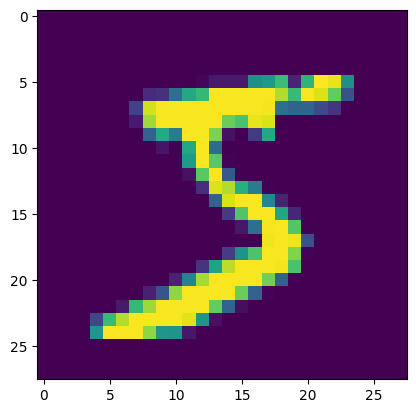

In [108]:
plt.imshow(single_image)

# PreProcessing Data

## Labels

In [109]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [110]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [132]:
from tensorflow.keras.utils import to_categorical
num_categories = 10

In [133]:
y_train.shape

(60000,)

In [134]:
y_cat_test = to_categorical(y_test, num_categories)

In [135]:
y_cat_train = to_categorical(y_train, num_categories)

In [148]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [119]:
single_image.max()

np.uint8(255)

In [120]:
single_image.min()

np.uint8(0)

In [121]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [122]:
scaled_single = x_train[0]

In [123]:
scaled_single

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [138]:
scaled_single.shape

(28, 28)

In [139]:
scaled_single.max()

np.float32(1.0)

In [140]:
scaled_single.dtype

dtype('float32')

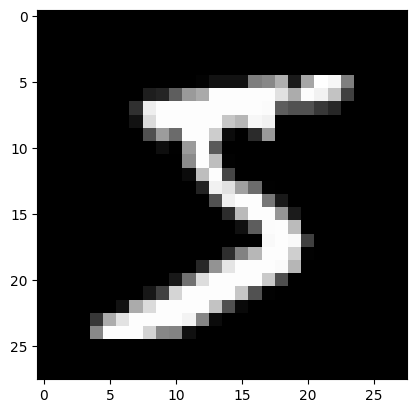

In [141]:
plt.imshow(scaled_single, cmap='gray')

## Reshaping the Data

In [142]:
x_train.shape

(60000, 28, 28)

In [143]:
x_test.shape

(10000, 28, 28)

In [144]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [145]:
x_train.shape

(60000, 28, 28, 1)

In [146]:
x_test = x_test.reshape(10000,28,28,1)

In [31]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [151]:
#Write your code here
model = Sequential()

# Build your model, compile it and train it
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_categories, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [153]:
# Train the model & add early stop
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9189 - loss: 0.2860 - val_accuracy: 0.9821 - val_loss: 0.0522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9854 - loss: 0.0490 - val_accuracy: 0.9871 - val_loss: 0.0402
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9860 - val_loss: 0.0447
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9870 - val_loss: 0.0394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9887 - val_loss: 0.0362
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9964 - loss: 0.0093 - val_accuracy: 0.9882 - val_loss: 0.0418
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9851 - val_loss: 0.0550


## Evaluate the Model

In [154]:
model.metrics_names

['loss', 'compile_metrics']

In [155]:
losses = pd.DataFrame(model.history.history)

In [156]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.960033,0.138196,0.9821,0.052230
1,0.985983,0.046714,0.9871,0.040196
2,0.990917,0.029979,0.9860,0.044733
3,0.993217,0.020083,0.9870,0.039364
4,0.995567,0.013061,0.9887,0.036227


<Axes: >

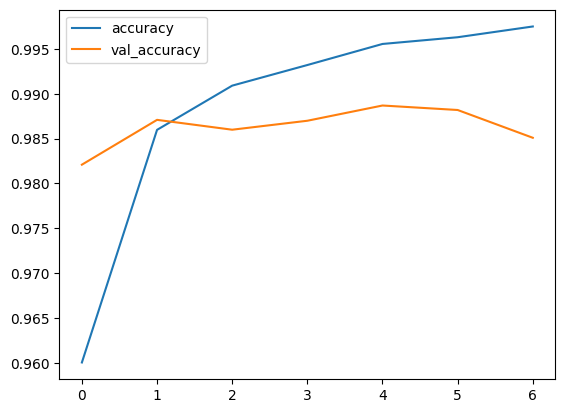

In [157]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

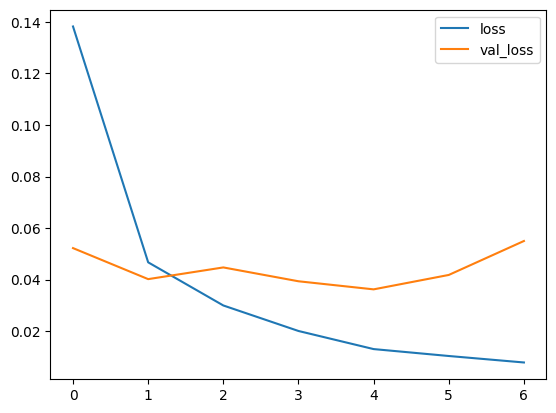

In [158]:
losses[['loss','val_loss']].plot()

In [159]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[0.054987188428640366, 0.9850999712944031]


In [160]:
from sklearn.metrics import classification_report,confusion_matrix

In [161]:
# predictions = model.predict_classes(x_test) # deprecated, used in older version of tensorflow
predictions=np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [166]:
y_cat_test.shape

(10000, 10)

In [167]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [168]:
predictions[0]

np.int64(7)

In [169]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [170]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [171]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    0,    1,    1,    0],
       [   0, 1120,    0,    1,    1,    0,    1,    1,   11,    0],
       [   3,    1, 1017,    0,    1,    0,    0,    6,    4,    0],
       [   0,    0,    0, 1002,    0,    4,    0,    1,    3,    0],
       [   1,    0,    2,    0,  962,    0,    1,    0,    4,   12],
       [   2,    0,    0,    9,    0,  876,    1,    0,    4,    0],
       [   9,    1,    0,    1,    1,    3,  941,    0,    2,    0],
       [   1,    1,    6,    2,    0,    0,    0, 1002,    5,   11],
       [   4,    0,    4,    0,    0,    0,    0,    0,  964,    2],
       [   2,    1,    0,    0,    2,    3,    0,    3,    8,  990]])

In [174]:

import seaborn as sns

In [175]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

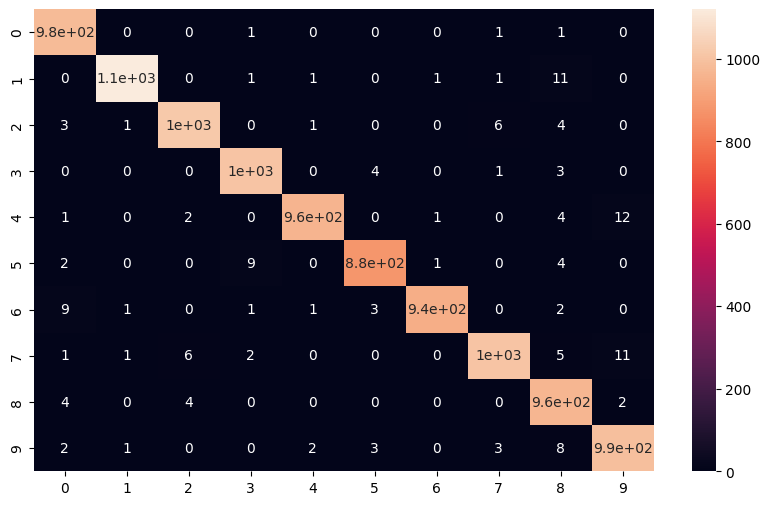

In [176]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [188]:
my_number = x_test[12]

In [191]:
len(x_test)

10000

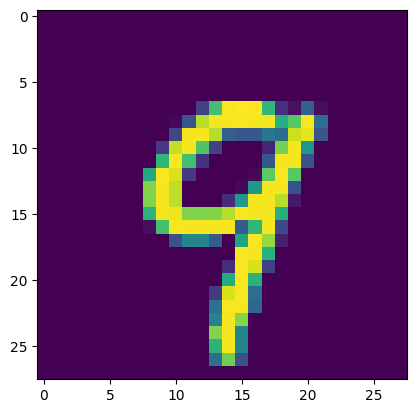

In [189]:
plt.imshow(my_number.reshape(28,28))

In [190]:
#predict=model.predict_classes(my_number.reshape(1,28,28,1)) # deprecated, used in older version of tensorflow
predict=np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([9])

In [186]:
model.predict(my_number.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[2.2408575e-14, 4.5841522e-09, 1.0000000e+00, 2.4226687e-13,
        5.3272307e-17, 1.7282372e-19, 4.6114401e-14, 2.1989295e-13,
        3.8262660e-13, 1.3748854e-16]], dtype=float32)

In [187]:
model.save('my_model.h5')